In [1]:
# to avoid errors on loading missingpy
import pandas as pd
import numpy as np
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
# With missforest we can use random forest to impute data. This is better than mean by far
from missingpy import MissForest
import lightgbm as lgb

# load stored data from data_imputation
%store -r train_df_imputed
train_df = data_frame_clean.copy()

## Training & validation with lightgbm

In [5]:
# getting ready x and y variables
x = train_df.drop(['Id','SalePrice'],axis=1)
y = train_df.SalePrice

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [6]:
# build the lightgbm model

model = lgb.LGBMRegressor(learning_rate=0.09,max_depth=-5,random_state=42) # lgb.LGBMClassifier() or LGBMRanker()
model.fit(x_train,y_train,eval_set=[(x_train,y_train), (x_test,y_test)],
          eval_metric='logloss')

[1]	training's l2: 4.98096e+09	valid_1's l2: 6.39194e+09
[2]	training's l2: 4.30358e+09	valid_1's l2: 5.62054e+09
[3]	training's l2: 3.73277e+09	valid_1's l2: 4.97157e+09
[4]	training's l2: 3.24462e+09	valid_1's l2: 4.42145e+09
[5]	training's l2: 2.83005e+09	valid_1's l2: 3.93308e+09
[6]	training's l2: 2.48079e+09	valid_1's l2: 3.53269e+09
[7]	training's l2: 2.17997e+09	valid_1's l2: 3.16351e+09
[8]	training's l2: 1.93353e+09	valid_1's l2: 2.87836e+09
[9]	training's l2: 1.72608e+09	valid_1's l2: 2.64363e+09
[10]	training's l2: 1.54386e+09	valid_1's l2: 2.42412e+09
[11]	training's l2: 1.39377e+09	valid_1's l2: 2.24761e+09
[12]	training's l2: 1.2565e+09	valid_1's l2: 2.09518e+09
[13]	training's l2: 1.14304e+09	valid_1's l2: 1.95314e+09
[14]	training's l2: 1.04304e+09	valid_1's l2: 1.83837e+09
[15]	training's l2: 9.60736e+08	valid_1's l2: 1.74257e+09
[16]	training's l2: 8.87437e+08	valid_1's l2: 1.6426e+09
[17]	training's l2: 8.13111e+08	valid_1's l2: 1.54357e+09
[18]	training's l2: 7.602

LGBMRegressor(learning_rate=0.09, max_depth=-5, random_state=42)

In [7]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9795
Testing accuracy 0.8751



Bad key figure.labelsize in file /Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/classic 2.mplstyle, line 310 ('figure.labelsize:   medium    # size of the figure label')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key figure.labelweight in file /Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/classic 2.mplstyle, line 311 ('figure.labelweight: normal    # weight of the figure label')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

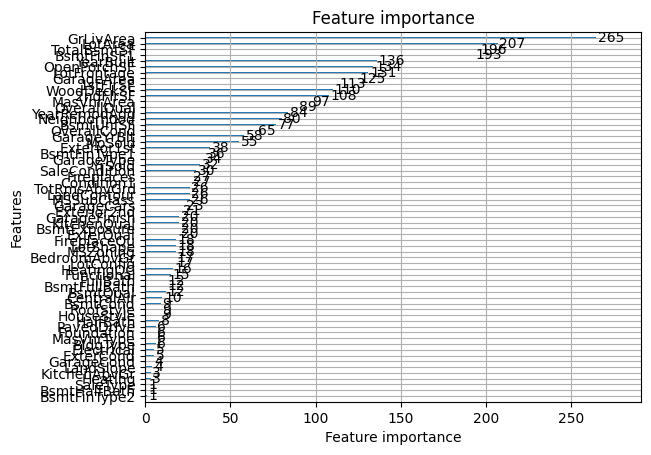

In [8]:
lgb.plot_importance(model)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

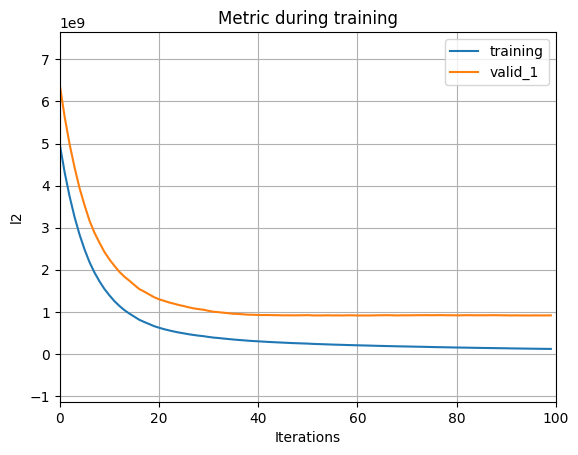

In [9]:
lgb.plot_metric(model)


ImportError: You must install graphviz and restart your session to plot tree.

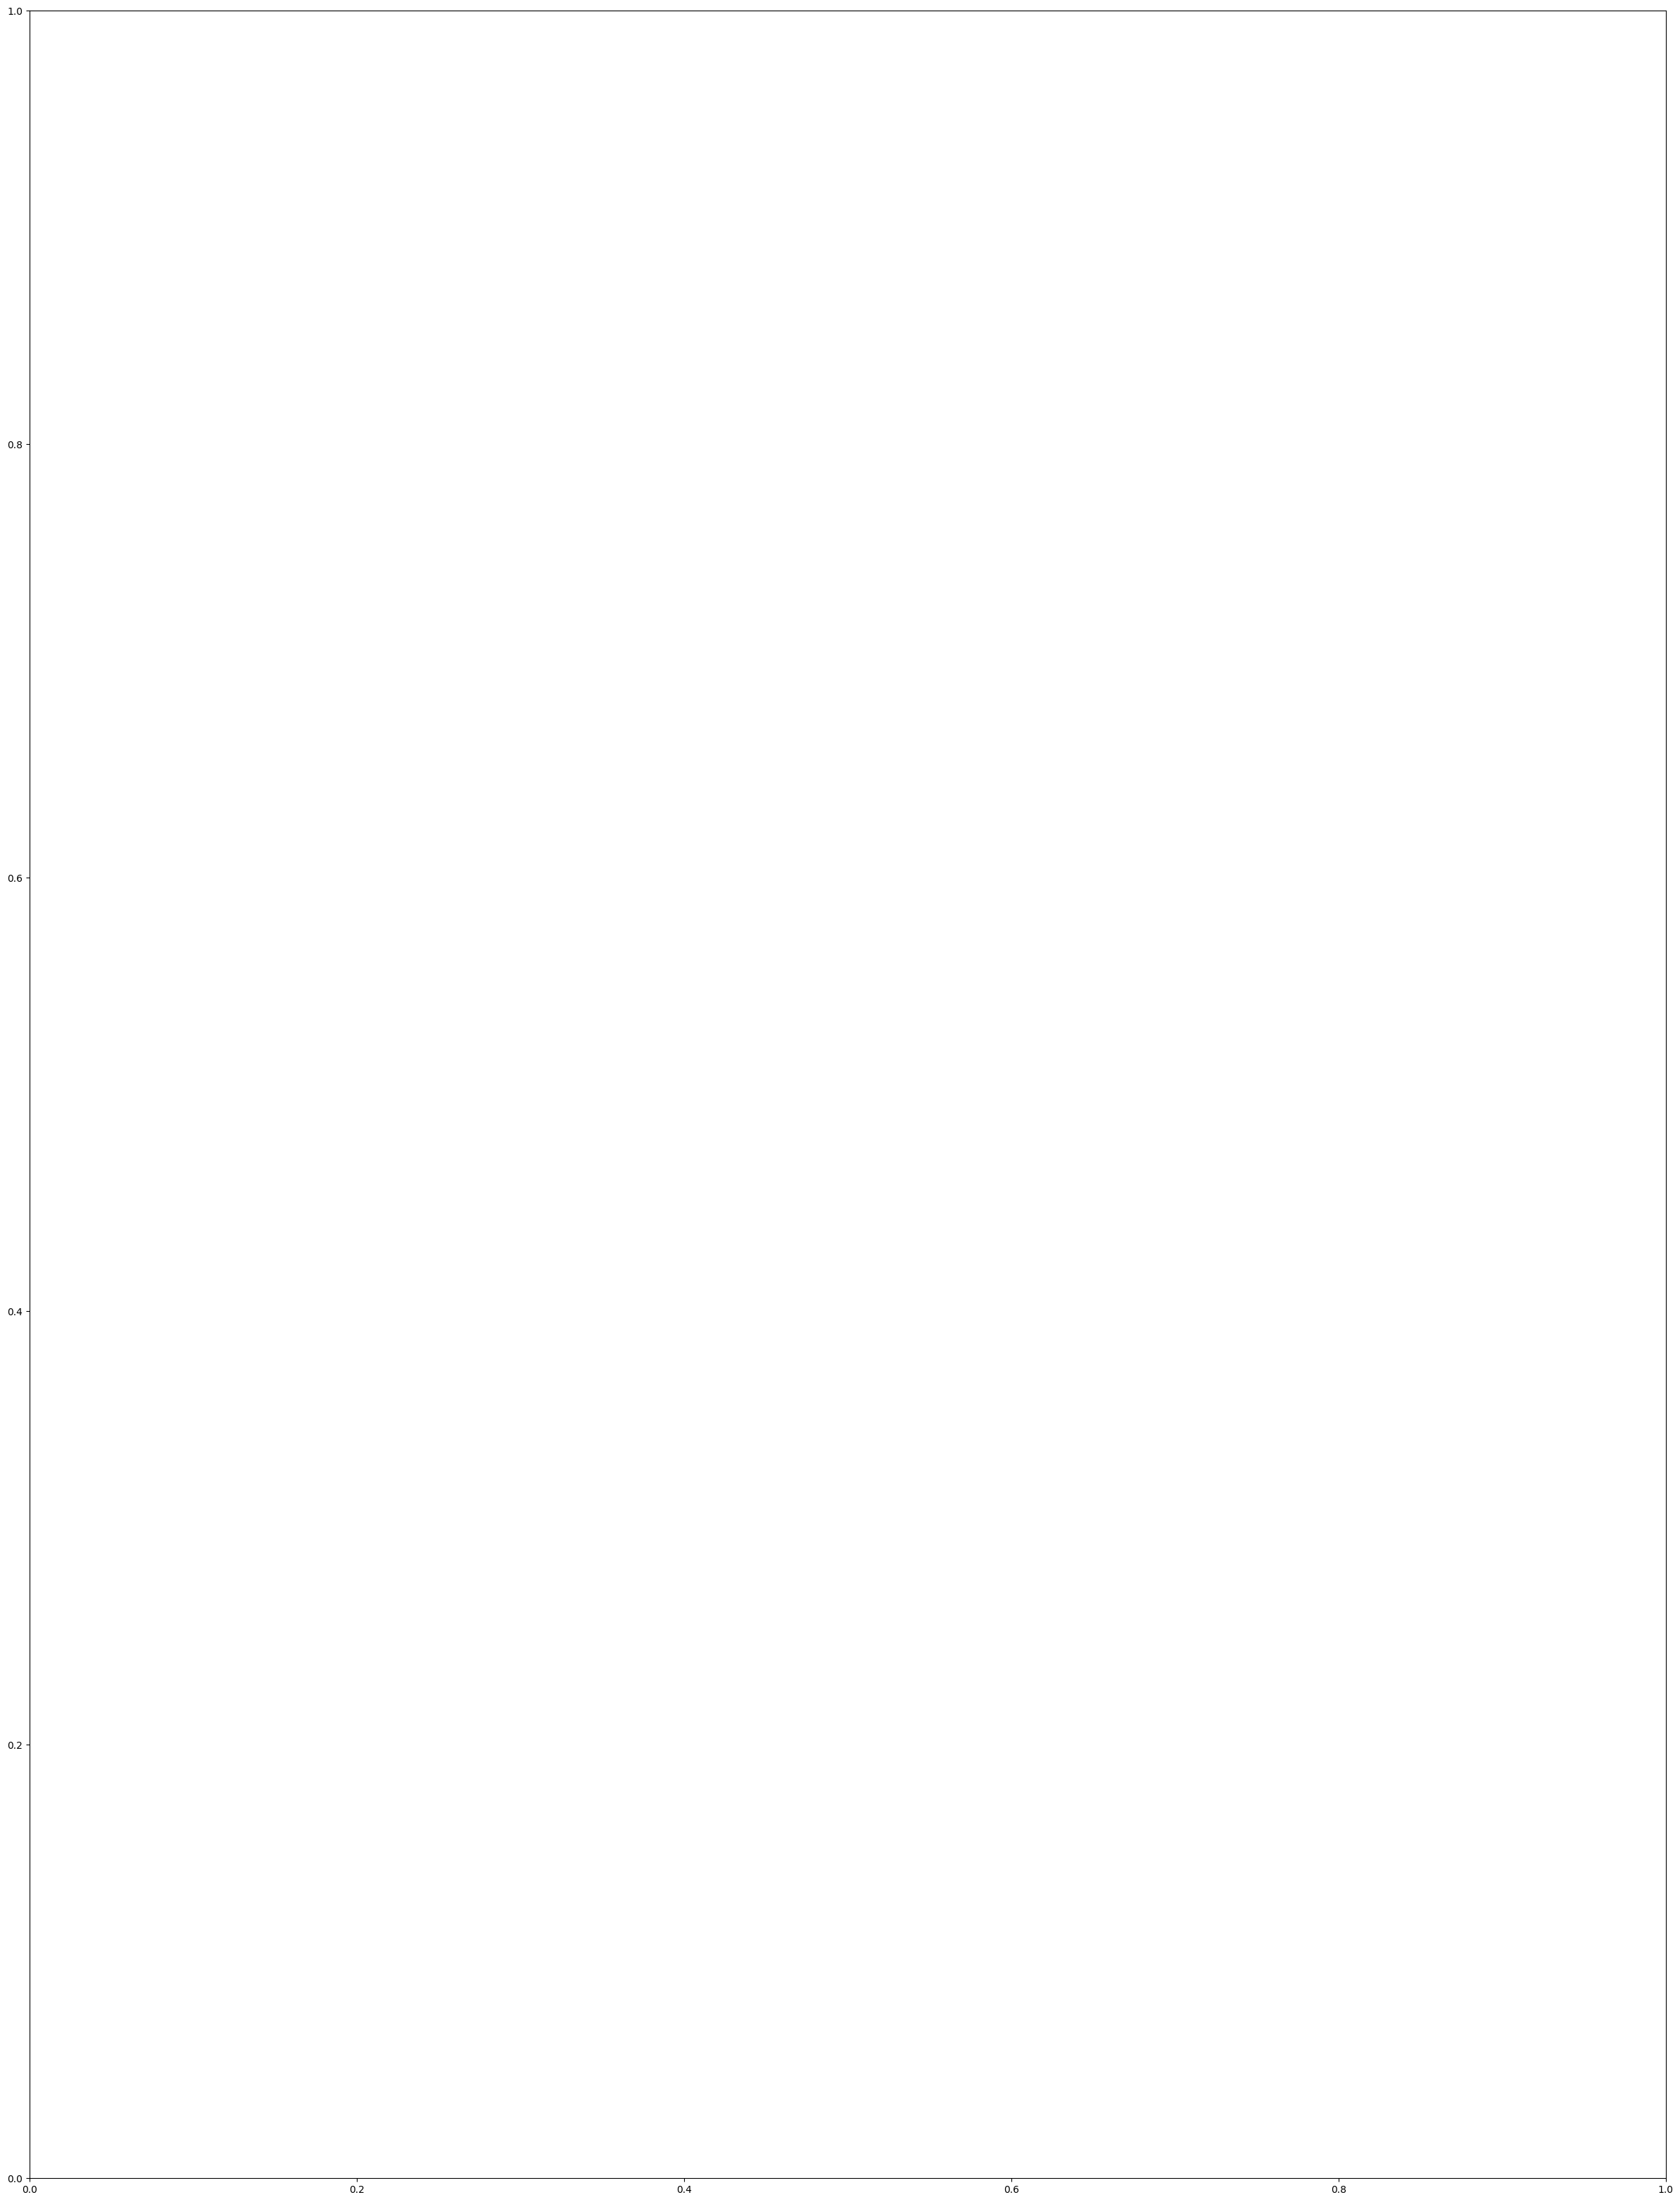

In [24]:
lgb.plot_tree(model,figsize=(30,40))


In [ ]:
# # graphic to classification problems
# metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')


In [ ]:
# # graphic to classification problems
# print(metrics.classification_report(y_test,model.predict(x_test)))
